In [147]:
###Verion 01/03/2025
### 01/03/2025: replace high dom. by grid decarb.

import pandas as pd
import researchpy as rp
import seaborn as sns
import numpy as np
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols #Ordinary Least Squares model
import statsmodels.stats.multicomp
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
%matplotlib inline
plt.style.use('seaborn-v0_8-ticks')
plt.rcParams["font.family"] = "Arial"

In [148]:
index_dict = {'x1': 'A', 'x2': 'B', 'x3': 'C', 'x4': 'D', 'x5': 'E', 'x6': 'F'}

label_dict = {'x1': 'Improving yield efficiencies',
             'x2': 'Optimizing EoL recycling',
             'x3': 'Grid decarbonization',
             'x4': 'Green hydrogen',
             'x5': 'Electrification',
             'x6': 'Inert anodes'}

color_dict = {'x1':'red',
             'x2':'orange',
             'x3': 'gray',
             'x4':'limegreen',
             'x5':'cadetblue',
             'x6': 'cyan'} 

### Loading data and inspection

In [150]:
file_path = "factorial_total.csv"
file_path = "factorial_domestic.csv"
df = pd.read_csv(file_path)

column_names = df.columns.tolist()
dtype_dict = {col: 'int64' for col in column_names}
dtype_dict[column_names[-1]] = 'float64'

df = pd.read_csv(file_path, dtype=dtype_dict)
#df = pd.read_csv("factorial_short_term.csv", dtype=dtype_dict)
df.rename_axis('sample', axis='index', inplace = True)

In [151]:
df

,treatment,rep,x1,x2,x3,x4,x5,x6,CO2
sample,,,,,,,,,
0,0,1,-1,-1,-1,-1,-1,-1,16.551542
1,0,2,-1,-1,-1,-1,-1,-1,16.719334
2,0,3,-1,-1,-1,-1,-1,-1,16.671253
3,1,1,-1,-1,-1,-1,1,1,11.334351
4,1,2,-1,-1,-1,-1,1,1,11.228278
...,...,...,...,...,...,...,...,...,...
91,30,2,1,1,1,1,-1,-1,3.874456
92,30,3,1,1,1,1,-1,-1,3.823915
93,31,1,1,1,1,1,1,1,1.905446


In [152]:
print(df[(df['x1'] == -1) & (df['x2'] == -1)]['CO2'].mean())
print(df[(df['x1'] == 1) & (df['x2'] == -1)]['CO2'].mean())
print(df[(df['x1'] == -1) & (df['x2'] == 1)]['CO2'].mean())
print(df[(df['x1'] == 1) & (df['x2'] == 1)]['CO2'].mean())

8.30666117233428
6.680023116081642
8.26274429636838
6.95652919253536


In [153]:
Describe = df.describe()
Describe

,treatment,rep,x1,x2,x3,x4,x5,x6,CO2
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,15.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.551489
std,9.281561,0.820783,1.005249,1.005249,1.005249,1.005249,1.005249,1.005249,4.290129
min,0.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.716008
25%,7.750000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3.803169
50%,15.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.121556
75%,23.250000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.043612
max,31.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.719334


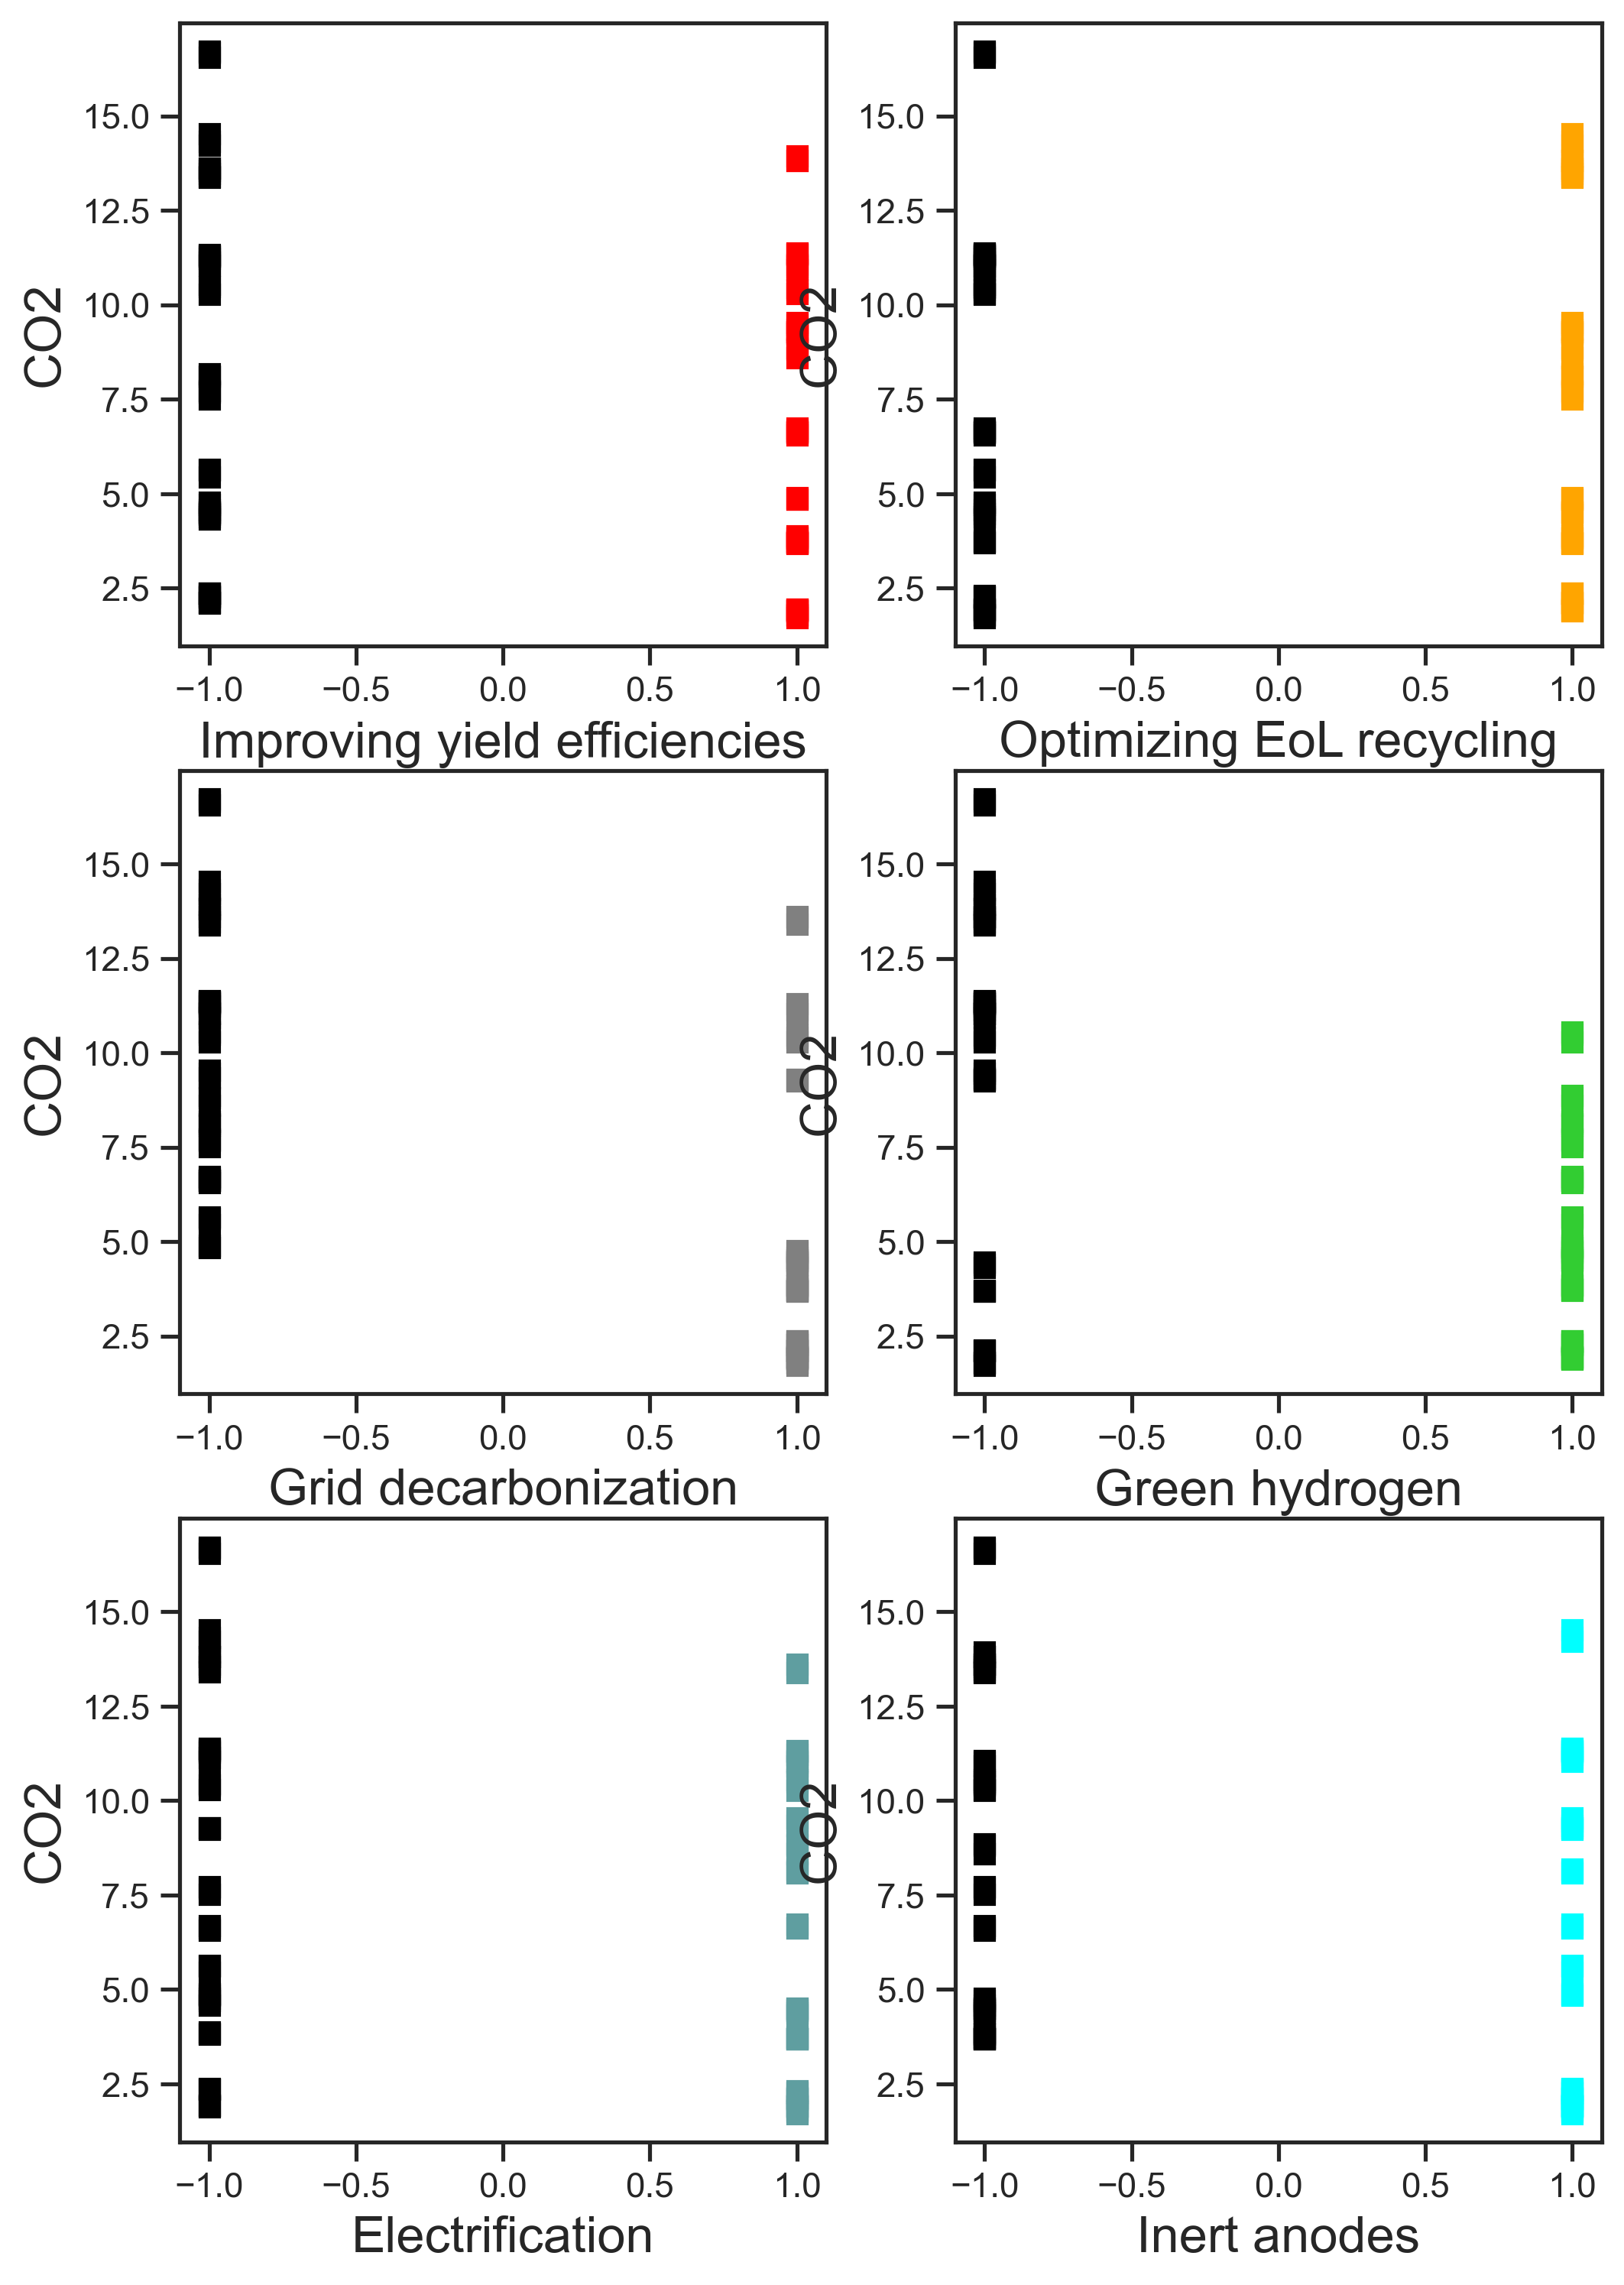

In [154]:
def sub_plot(df, var, row, col):
    df_pos = df[df[var] == 1]
    df_neg = df[df[var] == -1]

    axs[row,col].plot(df_pos[var],df_pos['CO2'],'s', color = color_dict[var])
    axs[row,col].plot(df_neg[var],df_neg['CO2'],'s', color = 'black')
    axs[row,col].set_xlabel(label_dict[var], fontsize = 16)
    axs[row,col].set_ylabel("CO2", fontsize = 16)
    
fig, axs = plt.subplots(3, 2, figsize=(8, 12), dpi = 300)

sub_plot(df,'x1', row = 0, col = 0)

sub_plot(df,'x2', row = 0, col = 1)

sub_plot(df,'x3', row = 1, col = 0)

sub_plot(df,'x4', row = 1, col = 1)

sub_plot(df,'x5', row = 2, col = 0)

sub_plot(df,'x6', row = 2, col = 1)


plt.show()

### Interaction plots
The "Main Effect Plots" in the DOE paper

<Figure size 1920x1440 with 0 Axes>

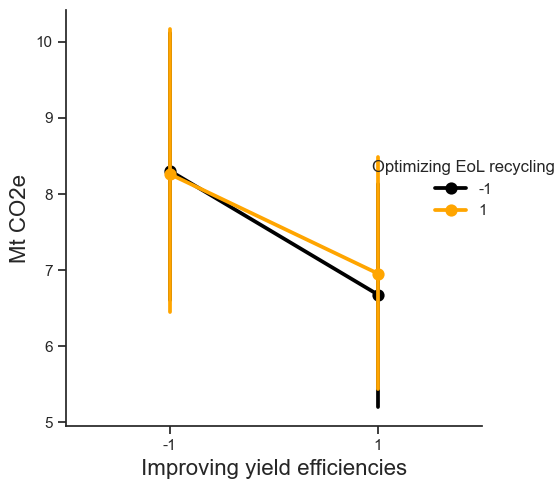

In [156]:
def interaction_effect_plots(var_1, var_2):
    custom_palette = {
    -1: 'black',  
    1: color_dict[var_1],  
    -1: 'black',  
    1: color_dict[var_2]}
                
    plt.figure(dpi = 300)
    plot = sns.catplot(x= var_1, y='CO2',hue= var_2,palette=custom_palette,
                       kind="point",data=df)
    plt.ylabel('Mt CO2e',fontsize=16)
    plt.xlabel(label_dict[var_1],fontsize=16)
    plot._legend.set_title(label_dict[var_2])
    plot._legend.set_bbox_to_anchor([1, 0.6])
    #plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
    #plot._legend.set_title_fontsize(12)
    plt.show()
interaction_effect_plots('x1','x2')

In [157]:
def interaction_subplots(var_1, var_2, idx, axs, df):
    custom_palette = {
        -1: 'black',  
        1: color_dict[var_1],  
        -1: 'black',  
        1: color_dict[var_2]
    }
                
    plot = sns.pointplot(x=var_1, y='CO2', hue=var_2, palette=custom_palette, data=df, ax=axs[idx])
    axs[idx].set_ylabel('Mt CO2e', fontsize=12)
    axs[idx].set_xlabel(index_dict[var_1] + ": " + label_dict[var_1], fontsize=12)
    #axs[idx].legend(title=label_dict[var_2])

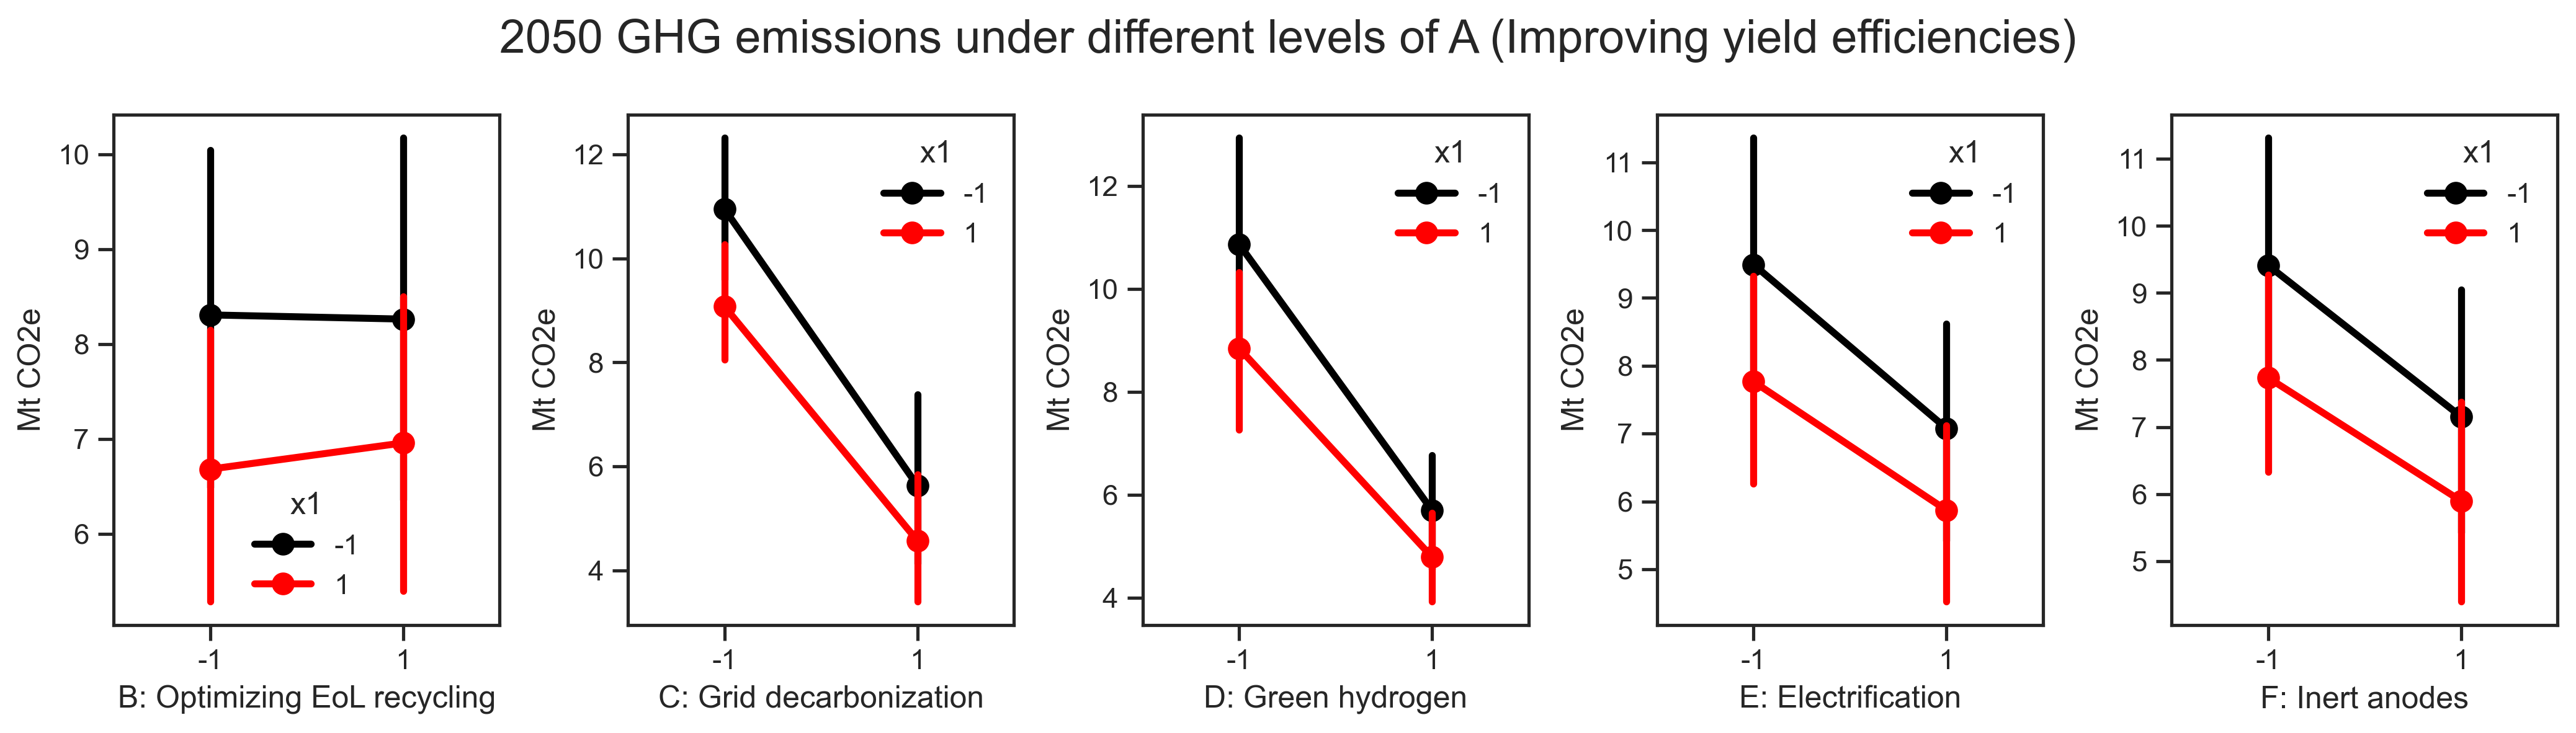

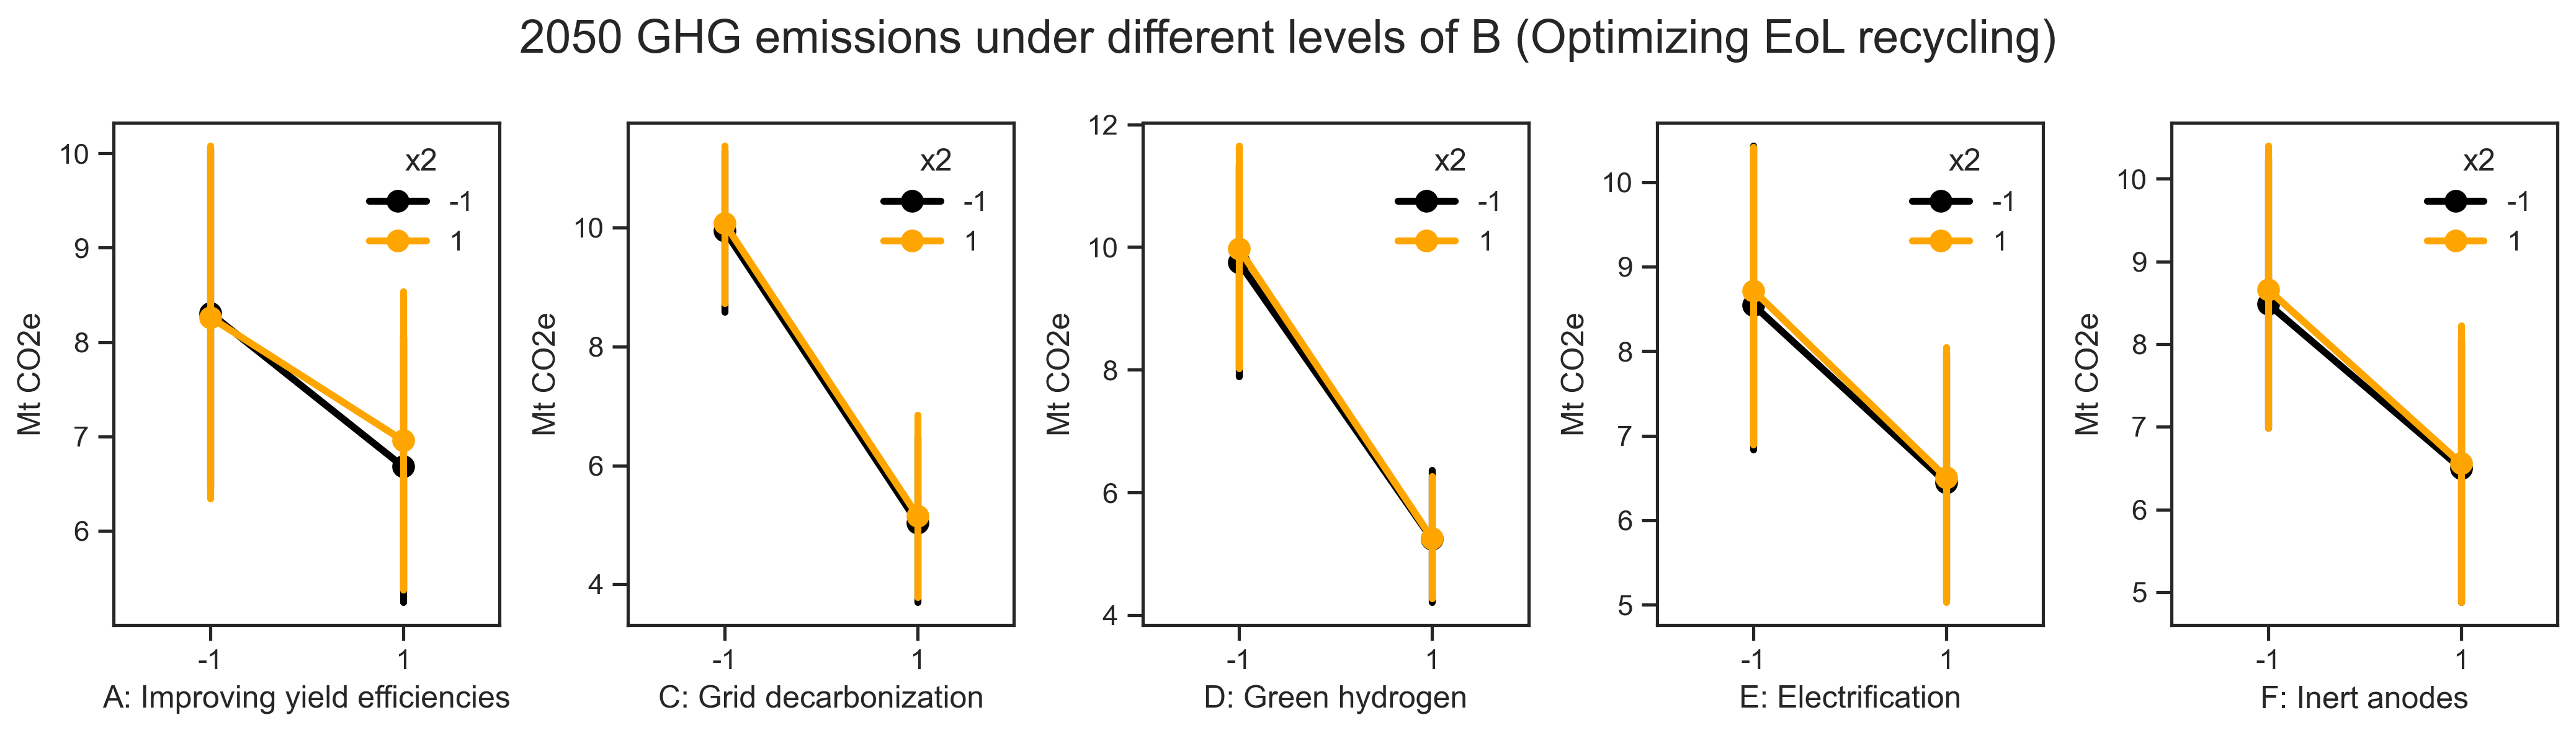

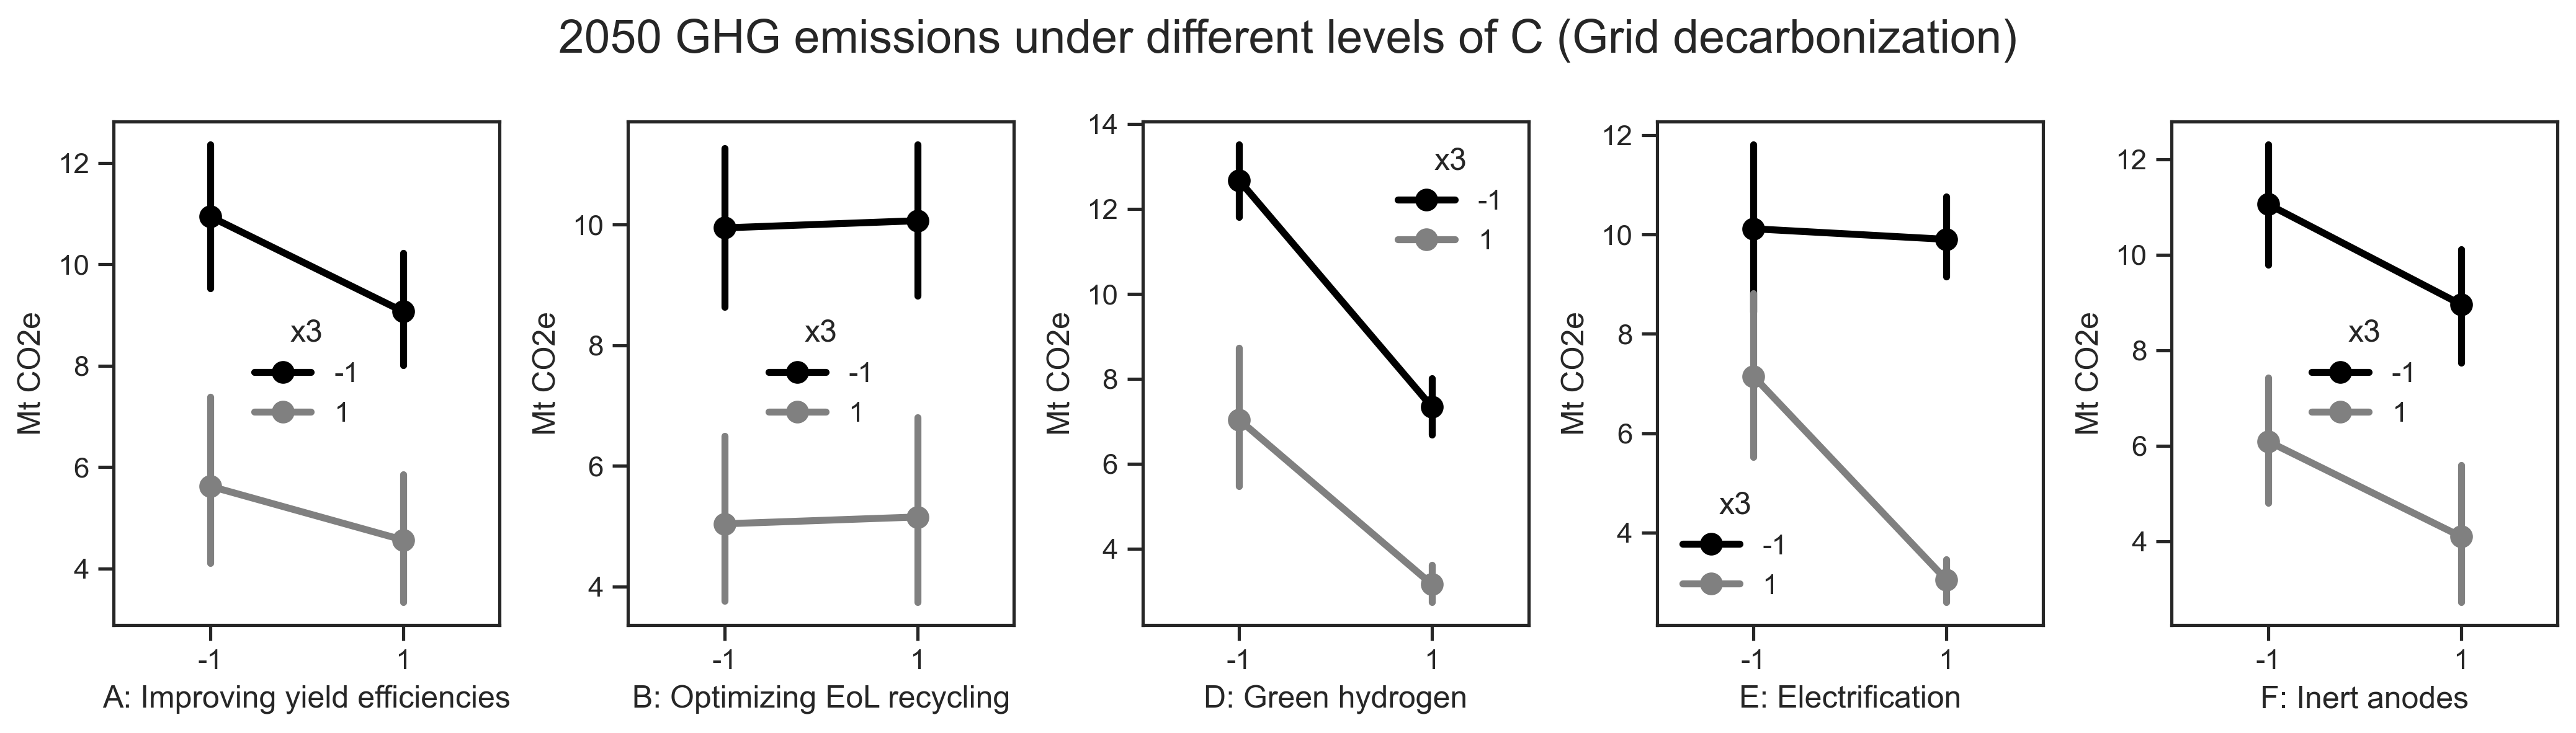

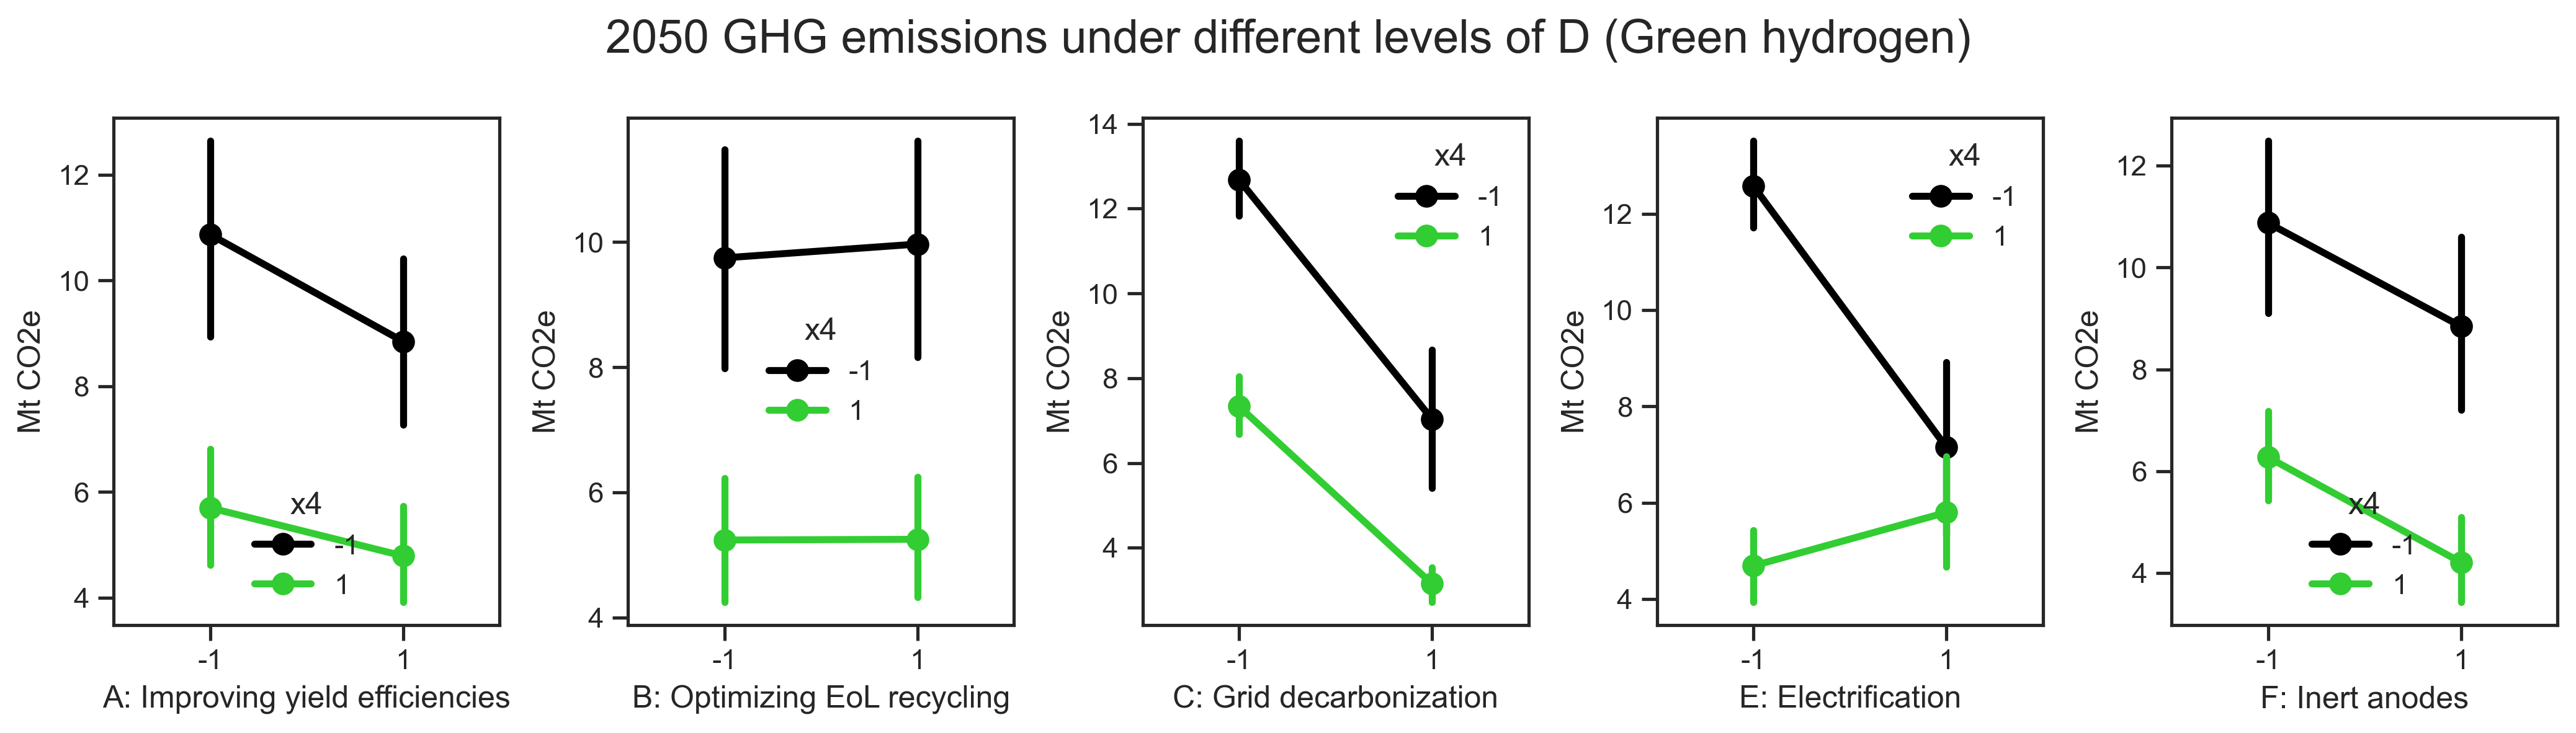

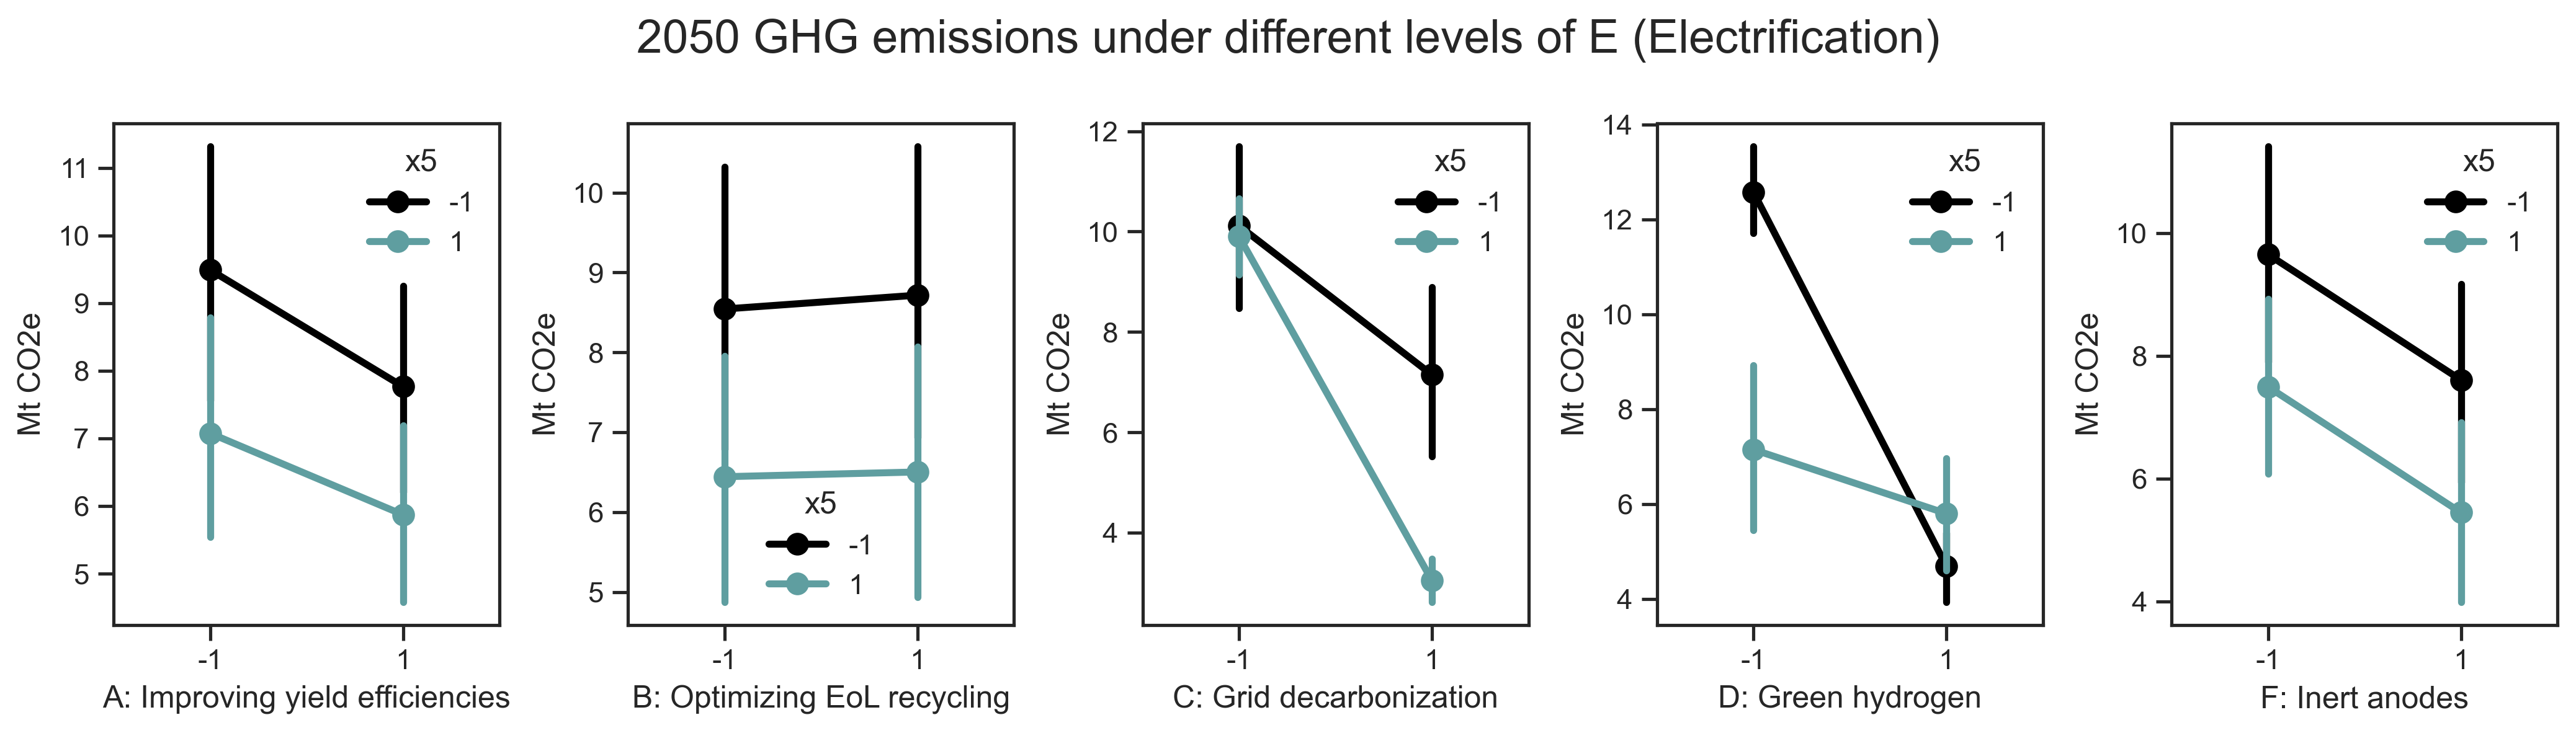

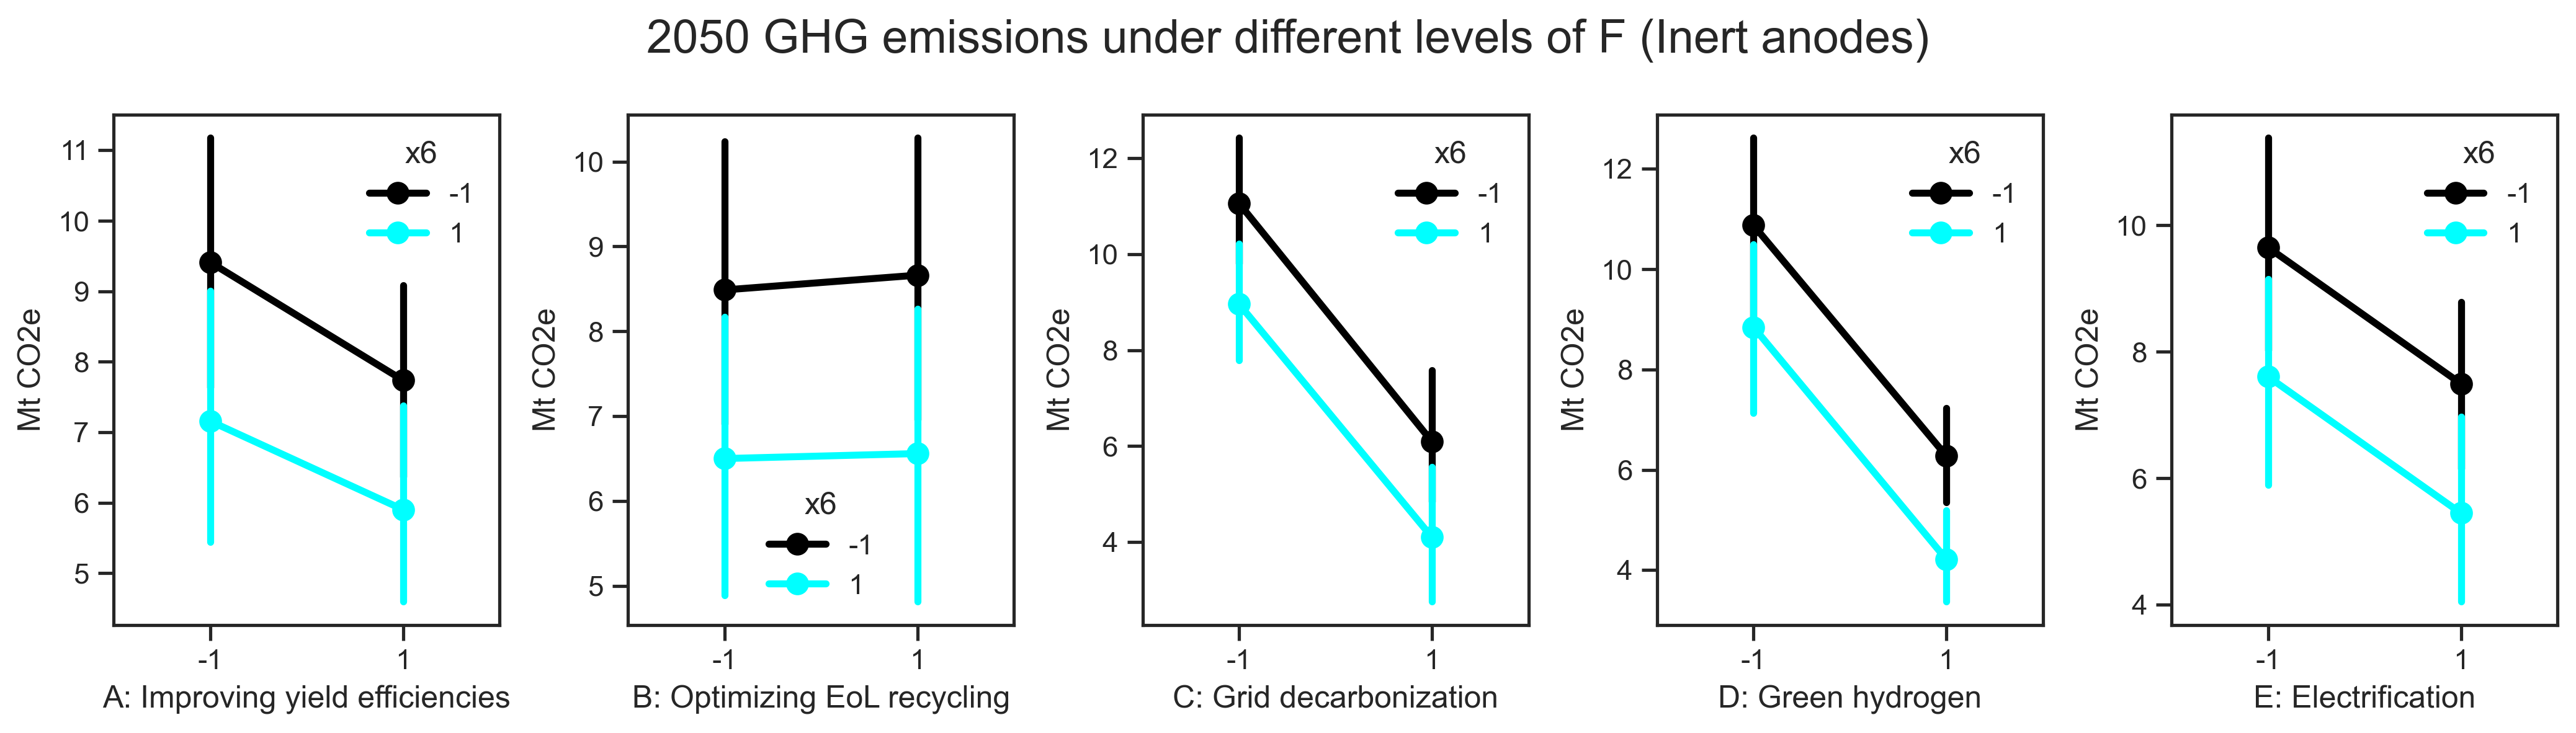

In [158]:
def interaction_plot(var):
    fig, axs = plt.subplots(1, 5, figsize=(14, 4), dpi=300)
    var_2 = var
    loc = 0
    for var_1 in ['x'+str(i) for i in range(1,7)]:
        if var_1 != var_2:
            interaction_subplots(var_1, var_2, loc, axs, df)
            loc = loc + 1
    
    
    fig.suptitle(f'2050 GHG emissions under different levels of {index_dict[var_2]} ({label_dict[var_2]})' , fontsize=18)
    fig.tight_layout()
    plt.show()


interaction_plot('x1')
interaction_plot('x2')
interaction_plot('x3')
interaction_plot('x4')
interaction_plot('x5')
interaction_plot('x6')

## Anova - General linear Regression Model

In [160]:
model = ols('CO2~(C(x1)+C(x2)+C(x3)+C(x4)+C(x5)+C(x6))**2',data = df).fit()

In [161]:
dof_total = model.nobs - 1
#the model degrees of freedom count the number of predictors (aka explanatory variables or indipendent variables), 
# WITHOHUT adding an additional degree for the intercept explicitly.
dof_model = model.df_model 
#degree of freedom of residual = num_observations - number of predictors (Xis and their 2-way interactions) - 1
dof_resid = model.df_resid
critical_t = stats.t.ppf(1 - 0.05/2, dof_resid)

In [162]:
print("Total Degrees of Freedom (n-1): ", dof_total)
print("Model Degrees of Freedom (p): ", dof_model)
print("Residual Degrees of Freedom (n-p-1): ", dof_resid)

Total Degrees of Freedom (n-1):  95.0
Model Degrees of Freedom (p):  21.0
Residual Degrees of Freedom (n-p-1):  74.0


In [163]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     310.0
Date:                Thu, 13 Nov 2025   Prob (F-statistic):           1.65e-63
Time:                        07:33:19   Log-Likelihood:                -60.089
No. Observations:                  96   AIC:                             164.2
Df Residuals:                      74   BIC:                             220.6
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                16.8209      0.247     68.180      0.000      16.329      17.313
C(x1)[T.1]               -3.0597      0.258    -11.874      0.000      -3.573      -2.546
C(x2)[T.1]                0.1775      0.258      0.689      0.493      -0.336       0.691
C(x3)[T.1]               -4.1559      0.258    -16.128      0.000      -4.669      -3.642
C(x4)[T.1]               -9.0485      0.258    -35.115      0.000      -9.562      -8.535
C(x5)[T.1]               -3.6797      0.258    -14.280      0.000      -4.193      -3.166
C(x6)[T.1]               -2.2320      0.258     -8.662      0.000      -2.745      -1.719
C(x1)[T.1]:C(x2)[T.1]     0.3204      0.210      1.523      0.132      -0.099       0.740
C(x1)[T.1]:C(x3)[T.1]     0.8127      0.210      3.863      0.000       0.393       1.232
C(x1)[T.1]:C(x4)[T.1]     1.1135      0.210      5.292      0.000       0.694       1.533
C(x1)[T.1]:C(x5)[T.1]     0.5209      0.210      2.476      0.016       0.102       0.940
C(x1)[T.1]:C(x6)[T.1]     0.4190      0.210      1.992      0.050      -0.000       0.838
C(x2)[T.1]:C(x3)[T.1]    -0.0055      0.210     -0.026      0.979      -0.425       0.414
C(x2)[T.1]:C(x4)[T.1]    -0.2081      0.210     -0.989      0.326      -0.627       0.211
C(x2)[T.1]:C(x5)[T.1]    -0.1141      0.210     -0.542      0.589      -0.533       0.305
C(x2)[T.1]:C(x6)[T.1]    -0.1152      0.210     -0.547      0.586      -0.534       0.304
C(x3)[T.1]:C(x4)[T.1]     1.4615      0.210      6.946      0.000       1.042       1.881
C(x3)[T.1]:C(x5)[T.1]    -3.8865      0.210    -18.472      0.000      -4.306      -3.467
C(x3)[T.1]:C(x6)[T.1]     0.1048      0.210      0.498      0.620      -0.314       0.524
C(x4)[T.1]:C(x5)[T.1]     6.5306      0.210     31.039      0.000       6.111       6.950
C(x4)[T.1]:C(x6)[T.1]    -0.0312      0.210     -0.148      0.882      -0.450       0.388
C(x5)[T.1]:C(x6)[T.1]    -0.0040      0.210     -0.019      0.985      -0.423       0.415
==============================================================================
Omnibus:                       13.944   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                4.103
Skew:                          -0.003   Prob(JB):                        0.129
Kurtosis:                       1.987   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Coefficient = 1/2 effect



In [165]:
def anova_table(aov):
    
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'mean_sq', 'df', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

In [166]:
res = sm.stats.anova_lm(model, type = 2)
res = anova_table(res)
res

C:\Users\agv03\AppData\Local\Temp\ipykernel_2916\1218244278.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


,sum_sq,mean_sq,df,F,PR(>F),eta_sq,omega_sq
C(x1),51.609766,51.609766,1.0,194.309265,2.166864e-22,2.951668e-02,0.029360
C(x2),0.324586,0.324586,1.0,1.222058,2.725383e-01,1.856376e-04,0.000034
C(x3),579.159034,579.159034,1.0,2180.516887,1.178975e-56,3.312329e-01,0.331031
C(x4),511.236367,511.236367,1.0,1924.790025,1.016290e-54,2.923866e-01,0.292190
C(x5),111.586953,111.586953,1.0,420.121627,3.088917e-32,6.381887e-02,0.063657
C(x6),100.394645,100.394645,1.0,377.982915,8.426148e-31,5.741776e-02,0.057257
C(x1):C(x2),0.616025,0.616025,1.0,2.319317,1.320383e-01,3.523175e-04,0.000200
C(x1):C(x3),3.963136,3.963136,1.0,14.921090,2.382446e-04,2.266599e-03,0.002114
C(x1):C(x4),7.439178,7.439178,1.0,28.008289,1.187402e-06,4.254619e-03,0.004102
C(x1):C(x5),1.627761,1.627761,1.0,6.128473,1.559022e-02,9.309500e-04,0.000779


In [167]:
coefficients = model.params
standard_errors = model.bse
t_statistics = coefficients / standard_errors
t_statistics

Intercept                68.179645
C(x1)[T.1]              -11.873757
C(x2)[T.1]                0.688955
C(x3)[T.1]              -16.127882
C(x4)[T.1]              -35.114545
C(x5)[T.1]              -14.279968
C(x6)[T.1]               -8.661746
C(x1)[T.1]:C(x2)[T.1]     1.522930
C(x1)[T.1]:C(x3)[T.1]     3.862783
C(x1)[T.1]:C(x4)[T.1]     5.292286
C(x1)[T.1]:C(x5)[T.1]     2.475575
C(x1)[T.1]:C(x6)[T.1]     1.991586
C(x2)[T.1]:C(x3)[T.1]    -0.026334
C(x2)[T.1]:C(x4)[T.1]    -0.989221
C(x2)[T.1]:C(x5)[T.1]    -0.542181
C(x2)[T.1]:C(x6)[T.1]    -0.547315
C(x3)[T.1]:C(x4)[T.1]     6.946298
C(x3)[T.1]:C(x5)[T.1]   -18.471908
C(x3)[T.1]:C(x6)[T.1]     0.498236
C(x4)[T.1]:C(x5)[T.1]    31.039320
C(x4)[T.1]:C(x6)[T.1]    -0.148393
C(x5)[T.1]:C(x6)[T.1]    -0.019039
dtype: float64

In [168]:
def replace_index(index):
    new_index = []
    for item in index:
        # Replace 'C(xi)[T.1]' with 'xi' and ':' with ''
        new_name = item.replace('C(', '').replace(')[T.1]', '').replace(':', '')
        new_index.append(new_name)
    return new_index

def map_terms(term):
    term = term.replace('C(', '').replace(')[T.1]', '')
    factors = term.split(':')
    mapped_factors = [index_dict.get(f, f) for f in factors]
    return ''.join(mapped_factors)

In [169]:
T_table = pd.DataFrame(t_statistics, columns = ['t_stat'])
T_table['Var'] = replace_index(T_table.index)
### Use variable names as Label
#T_table['Term'] = replace_index(T_table.index)
### Use Alphabetical labels 
T_table['Term'] = T_table.index.map(map_terms)


T_table['abs'] = abs(T_table['t_stat'])
T_table.drop('Intercept', inplace = True)

T_table

,t_stat,Var,Term,abs
C(x1)[T.1],-11.873757,x1,A,11.873757
C(x2)[T.1],0.688955,x2,B,0.688955
C(x3)[T.1],-16.127882,x3,C,16.127882
C(x4)[T.1],-35.114545,x4,D,35.114545
C(x5)[T.1],-14.279968,x5,E,14.279968
C(x6)[T.1],-8.661746,x6,F,8.661746
C(x1)[T.1]:C(x2)[T.1],1.522930,x1x2,AB,1.522930
C(x1)[T.1]:C(x3)[T.1],3.862783,x1x3,AC,3.862783
C(x1)[T.1]:C(x4)[T.1],5.292286,x1x4,AD,5.292286
C(x1)[T.1]:C(x5)[T.1],2.475575,x1x5,AE,2.475575


### Pareto Chart
The Pareto chart shows the absolute values of the standardized effects from the largest effect to the smallest effect. The chart also plots a reference line to indicate which effects are statistically significant. 

The standardized effects are t-statistics that test the null hypothesis that the effect is 0. 

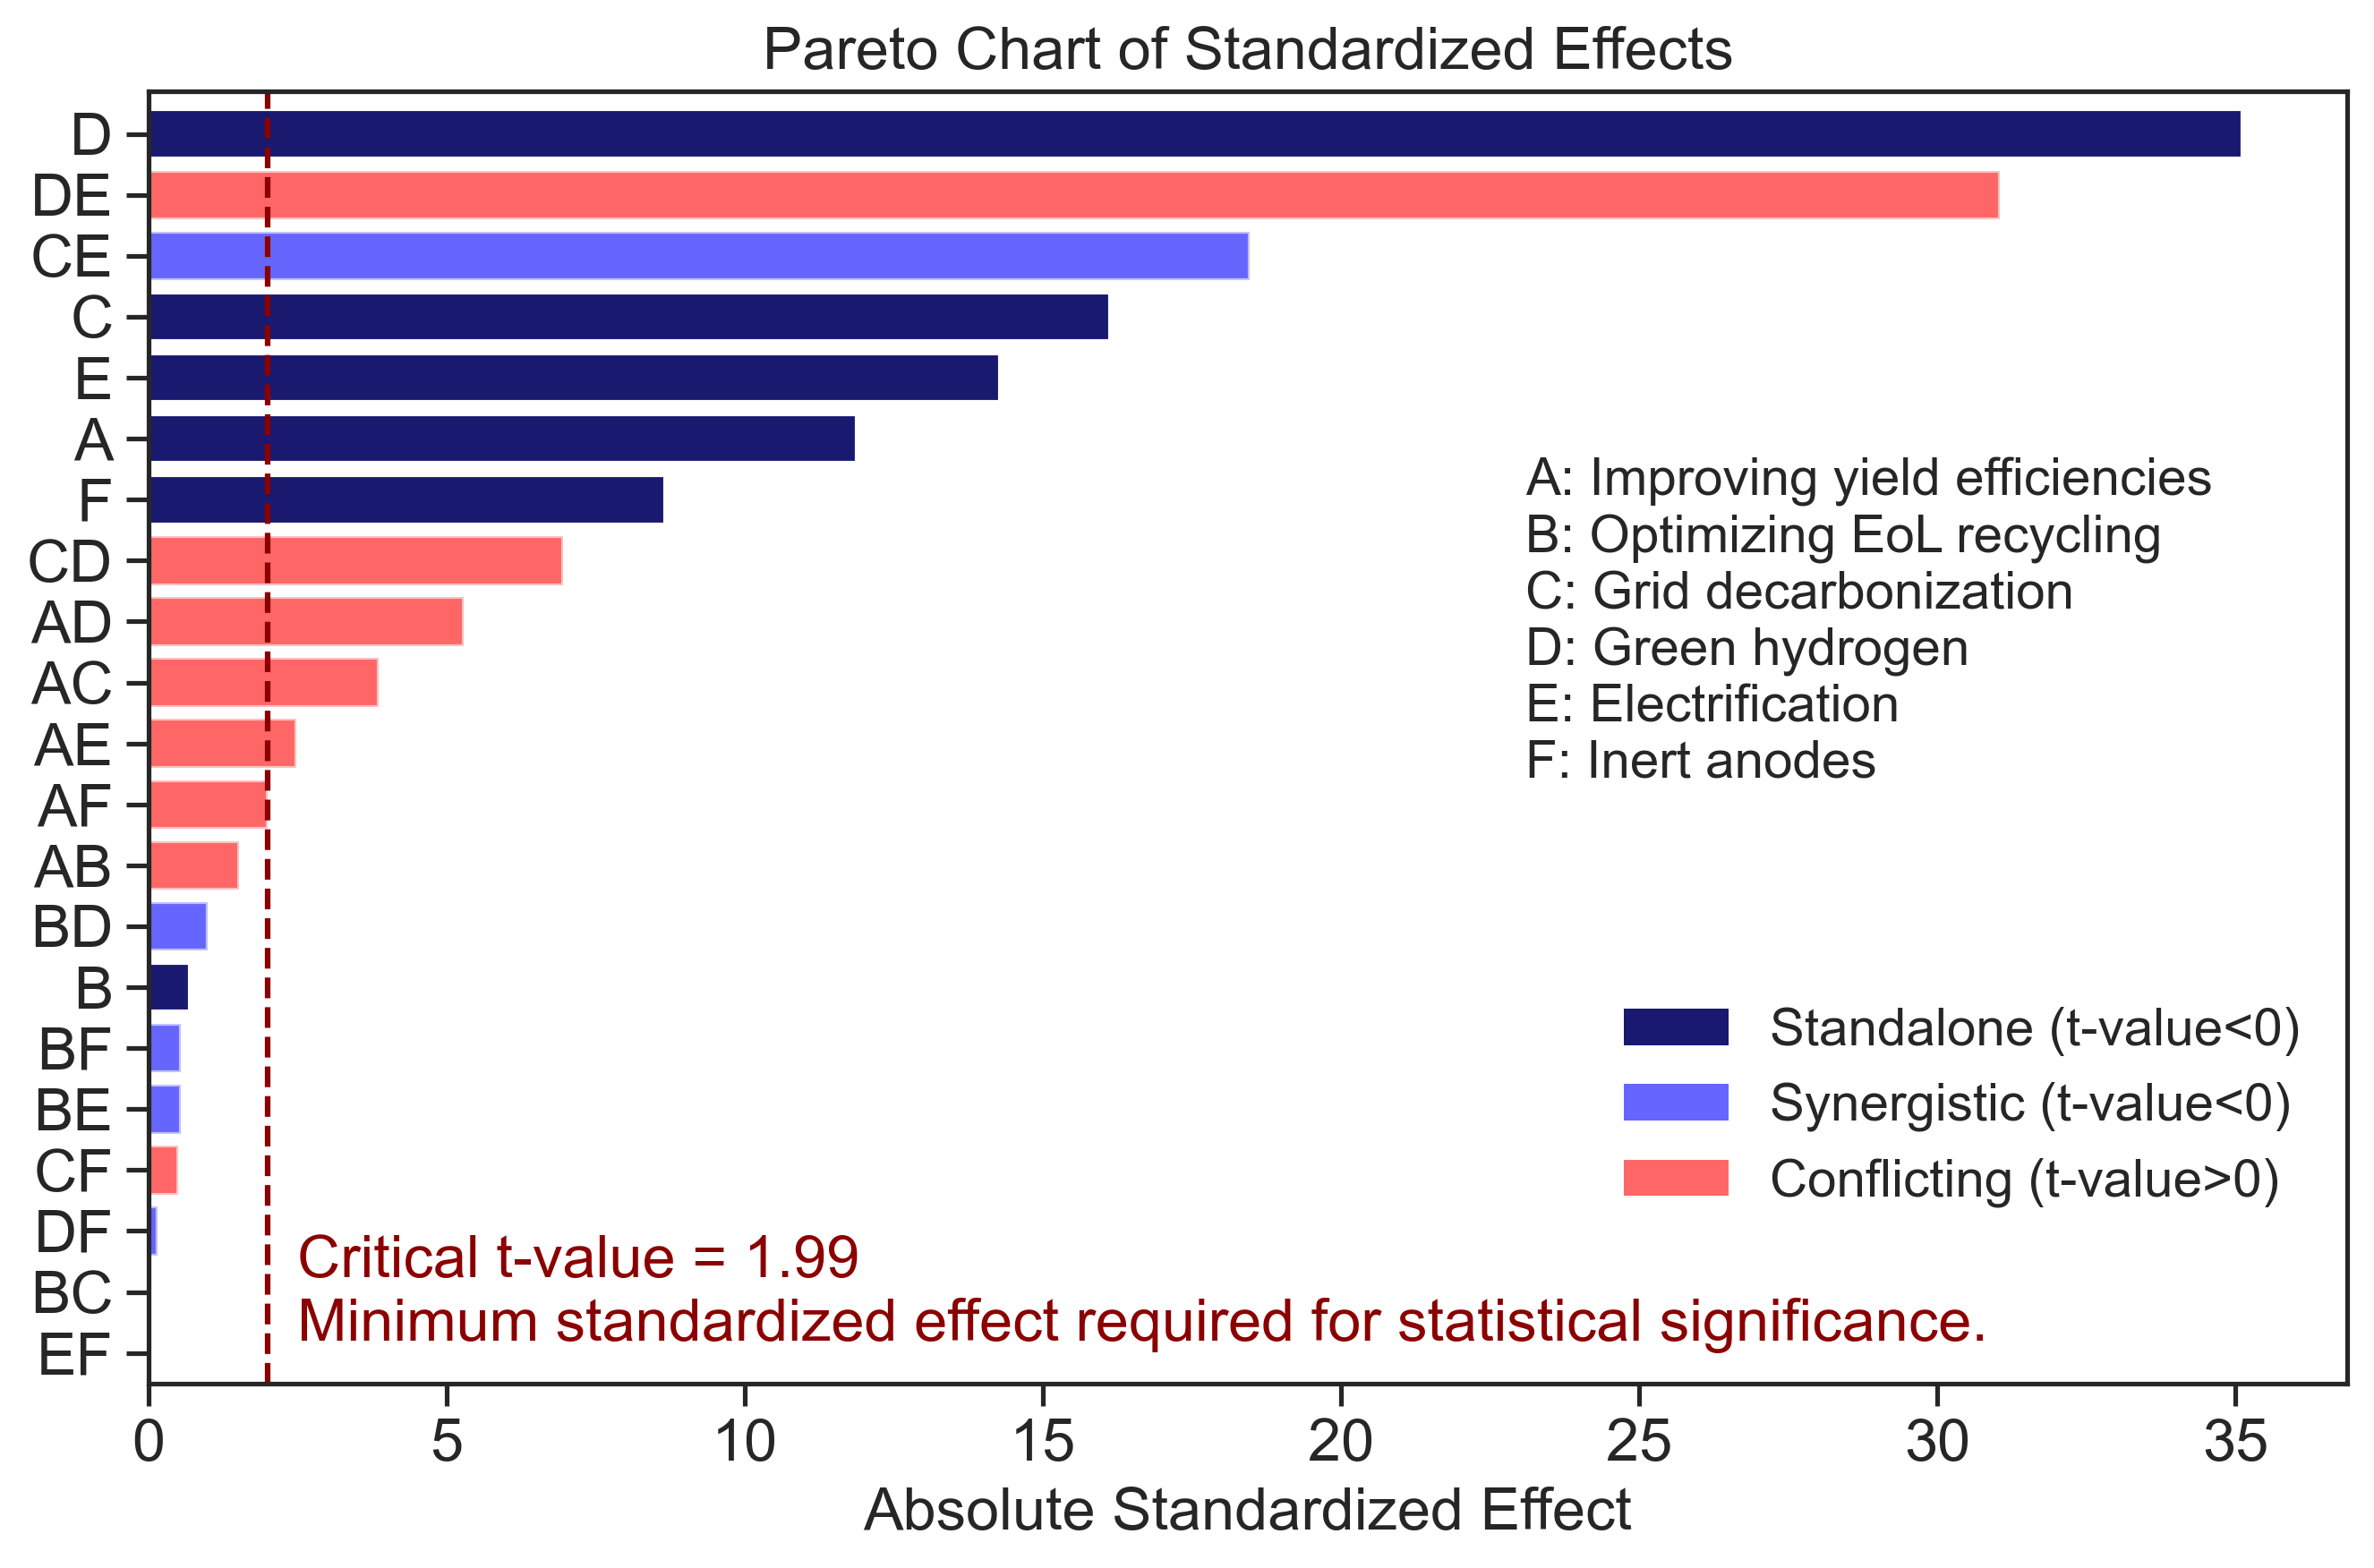

In [171]:
import matplotlib.patches as patches
def pareto_plot(df, dof):
    color_map = {True: 'blue', False: 'red'}
    alpha = 0.6
    critical_t = stats.t.ppf(1 - 0.05/2, dof)

    df = df.sort_values('abs', ascending=True)
    
    plt.figure(figsize = (9,6), dpi = 300)
    ax = plt.gca()
    
    for row in df.index:
        var = df.loc[row,'Term']
        t = df.loc[row, 't_stat']
        if len(var)>1:
            plt.barh(var, abs(t), color = color_map[t < 0], alpha = alpha)
        else:
            plt.barh(var, abs(t), color = 'midnightblue', alpha = 1)

    plt.axvline(x = critical_t, color='darkred', linestyle='--') #label=f'Critical t-value ({critical_t:.2f})'
    plt.text(critical_t+0.5, 0, f'Critical t-value = {critical_t:.2f}\nMinimum standardized effect required for statistical significance.', 
             verticalalignment='bottom', horizontalalignment='left', 
             color='darkred', fontsize = 16, rotation=0)

    
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel('Absolute Standardized Effect',fontsize=16)

    # Annotation for single variables in a text box
    vars = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']
    labels = [index_dict[var] for var in vars]
    for i in range(len(vars)):
        var = vars[i]
        labels[i] = labels[i] + ": " + label_dict[var]
    
    textstr = '\n'.join(labels)    
    props = dict(boxstyle='round', facecolor= 'none', alpha=0.5)
    plt.gcf().text(0.64, 0.6, textstr, fontsize=14, bbox=props, verticalalignment='center', horizontalalignment='left')

    # Custom legend
    dark_patch = patches.Patch(color='midnightblue', label='Standalone (t-value<0)', linewidth = 0)
    blue_patch = patches.Patch(color='blue', label = 'Synergistic (t-value<0)', linewidth = 0, alpha = alpha)
    red_patch = patches.Patch(color='red', label = 'Conflicting (t-value>0)', linewidth = 0, alpha = alpha)
    plt.legend(handles=[dark_patch, blue_patch, red_patch],
               fontsize=14, loc='lower right', 
               bbox_to_anchor = (1, 0.1), frameon= False, fancybox=True, framealpha=0.5)
    

    ax.set_ylim(bottom = - 0.5, top = len(df) - 0.3)

    plt.title("Pareto Chart of Standardized Effects",fontsize=16)
    plt.tight_layout()
    plt.show()
    
pareto_plot(T_table, dof = dof_resid)

<Figure size 1920x1440 with 0 Axes>

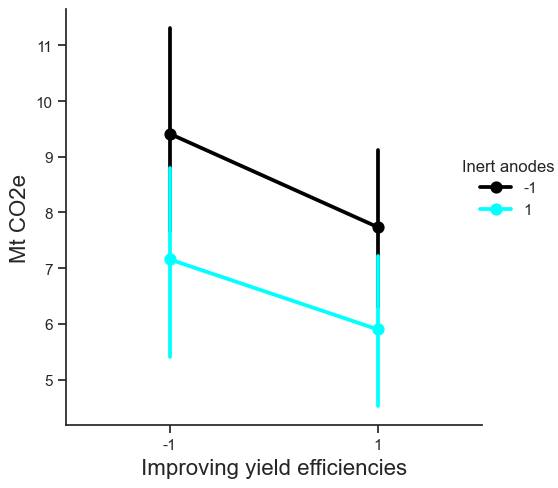

In [172]:
interaction_effect_plots('x1','x6')

### Normal plot of the effects

In [174]:
import scipy.stats as stats
T_table =T_table.sort_values(by=['t_stat'])

T_table['i']=np.arange(1,len(T_table)+1)
T_table['linear']=(T_table['i']-0.5)/len(T_table)
T_table['quantile']=stats.norm.ppf(T_table['linear'])

T_table

,t_stat,Var,Term,abs,i,linear,quantile
C(x4)[T.1],-35.114545,x4,D,35.114545,1,0.023810,-1.980752
C(x3)[T.1]:C(x5)[T.1],-18.471908,x3x5,CE,18.471908,2,0.071429,-1.465234
C(x3)[T.1],-16.127882,x3,C,16.127882,3,0.119048,-1.179761
C(x5)[T.1],-14.279968,x5,E,14.279968,4,0.166667,-0.967422
C(x1)[T.1],-11.873757,x1,A,11.873757,5,0.214286,-0.791639
C(x6)[T.1],-8.661746,x6,F,8.661746,6,0.261905,-0.637484
C(x2)[T.1]:C(x4)[T.1],-0.989221,x2x4,BD,0.989221,7,0.309524,-0.497201
C(x2)[T.1]:C(x6)[T.1],-0.547315,x2x6,BF,0.547315,8,0.357143,-0.366106
C(x2)[T.1]:C(x5)[T.1],-0.542181,x2x5,BE,0.542181,9,0.404762,-0.241040
C(x4)[T.1]:C(x6)[T.1],-0.148393,x4x6,DF,0.148393,10,0.452381,-0.119648


In [175]:
import numpy as np
import numpy.random as random 

The normal probability plot of the effects shows the standardized effects relative to a distribution fit line for the case when all the effects are 0. 

The standardized effects are t-statistics that test the null hypothesis that the effect is 0. Effects further from 0 on the x-axis have greater magnitude. Effects further from 0 are more statistically significant.

- Positive main effects increase the response when the settings change from the low value of a factor to the high value. 

- Negative main effects decrease the response when the settings change from the low value of a factor to the high value. 

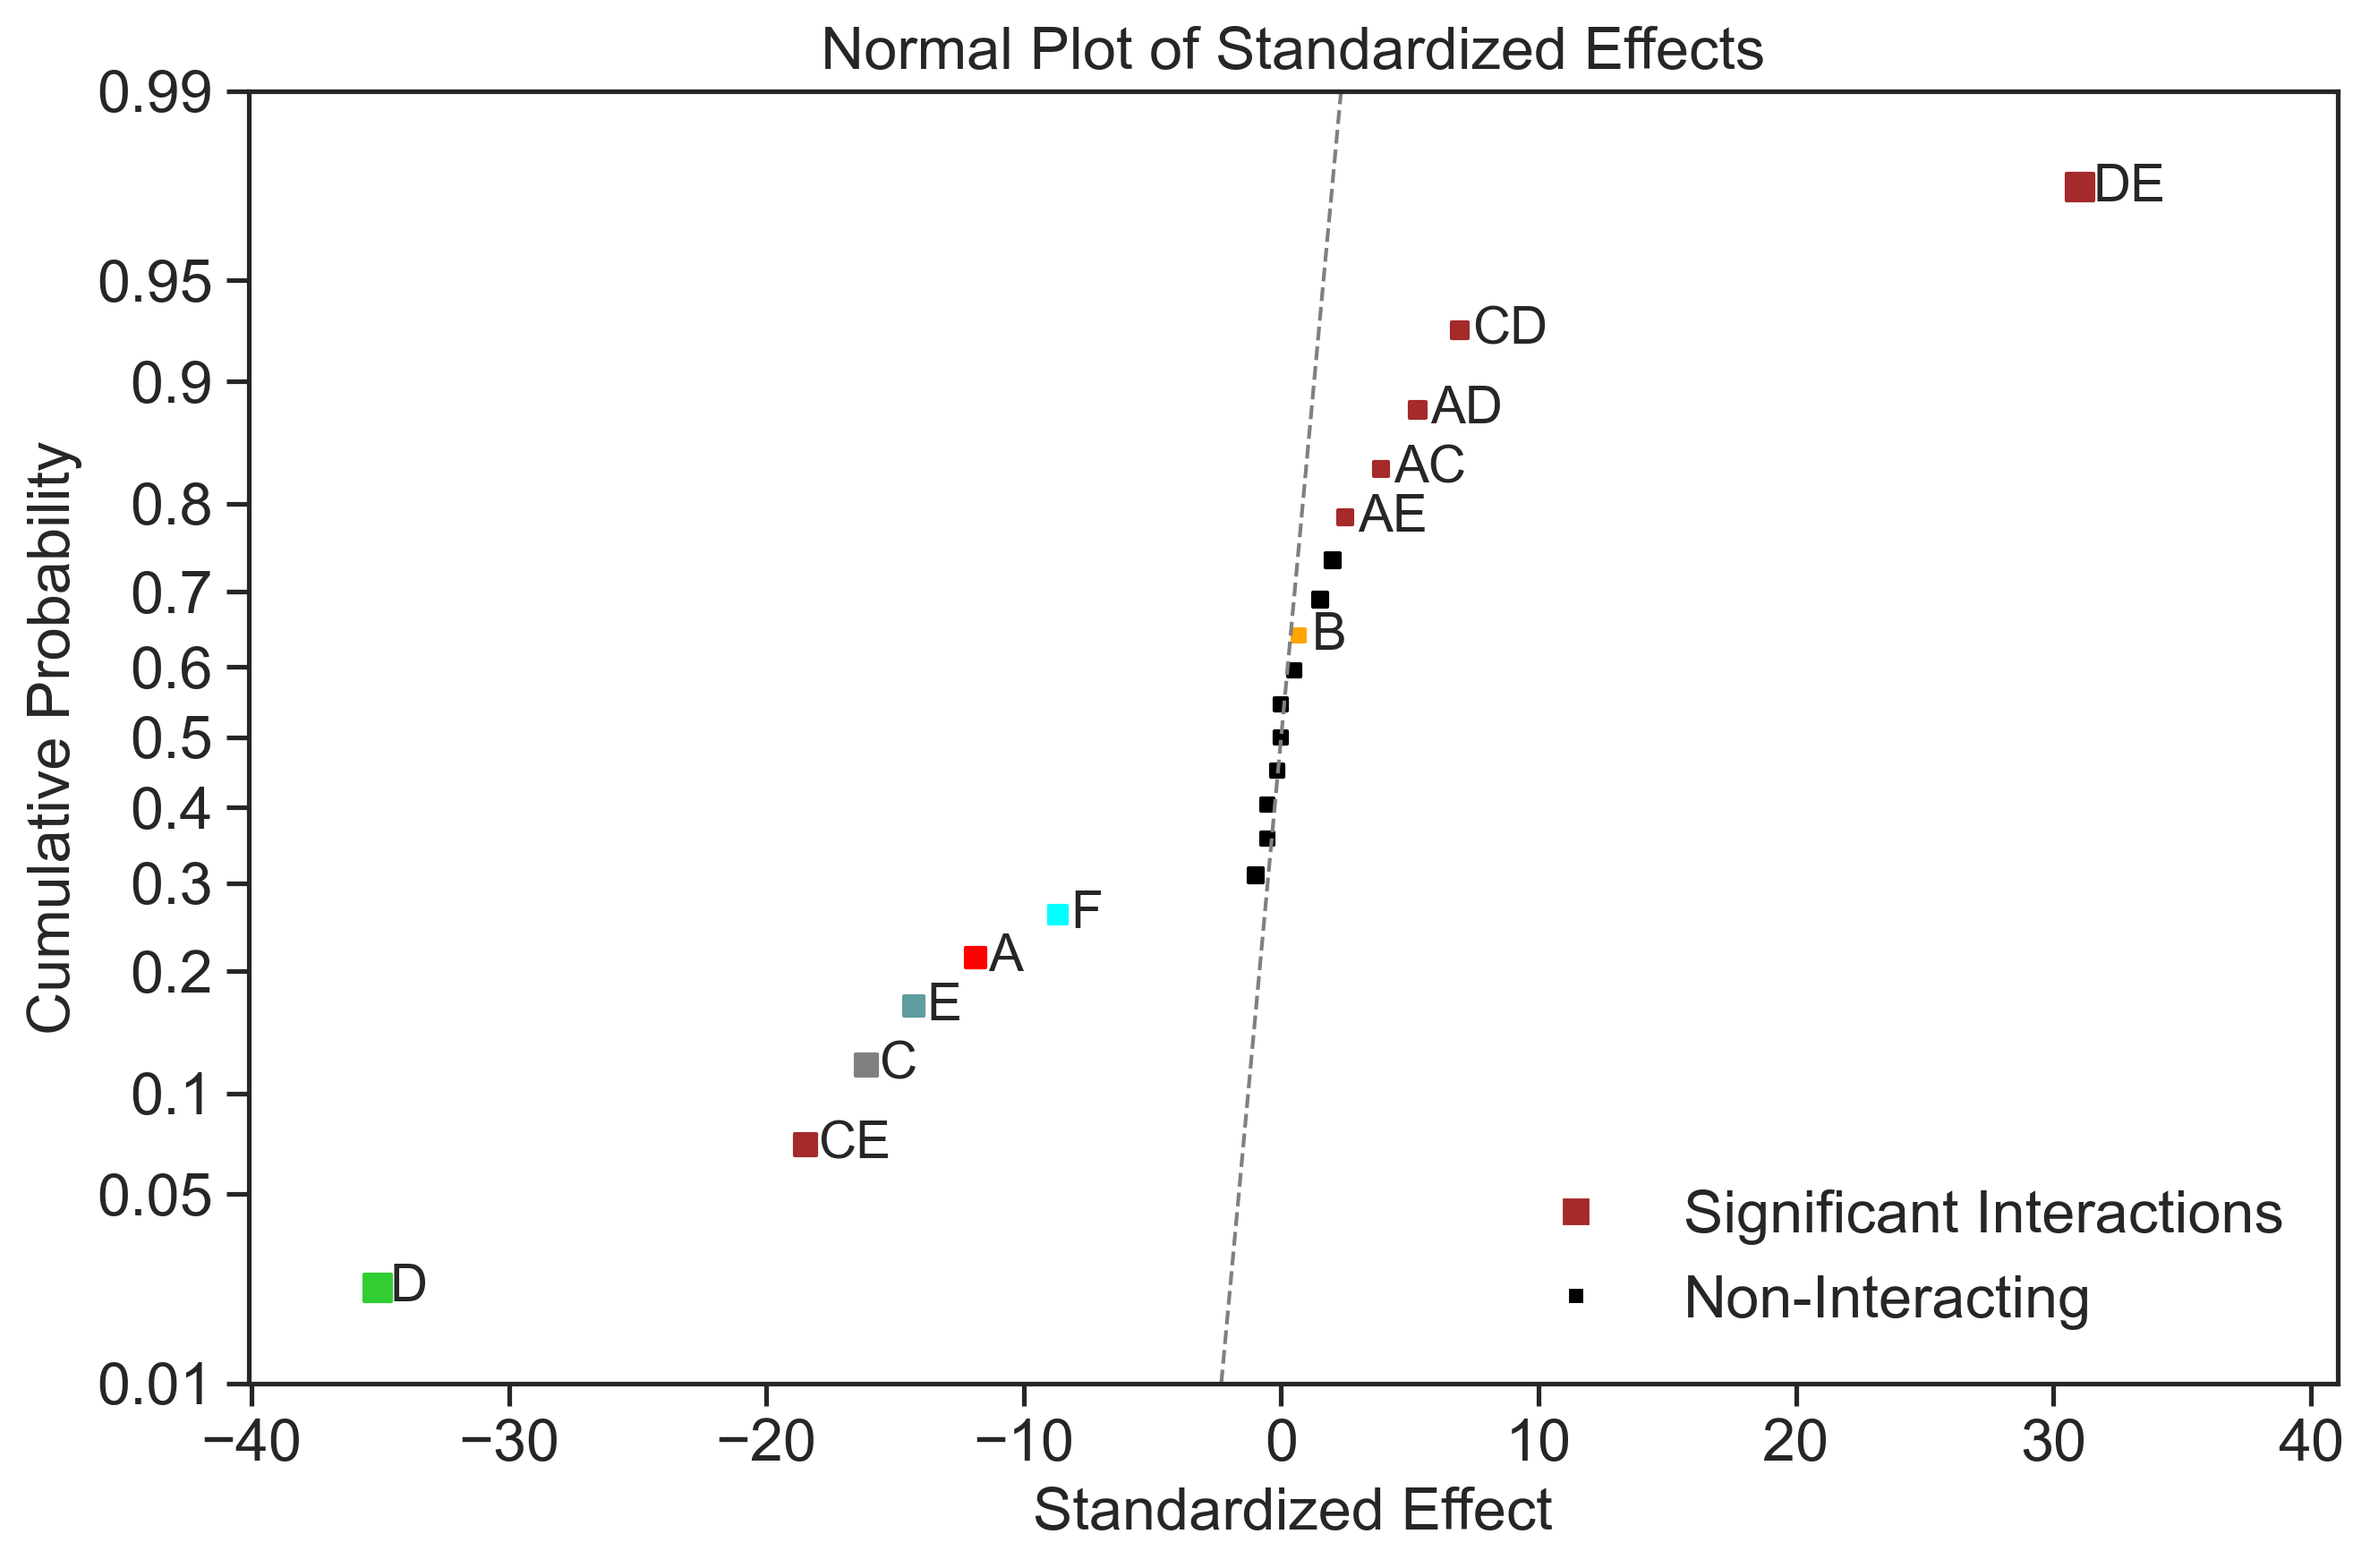

In [177]:
plt.figure(figsize = (9, 6), dpi = 300)
for i in range(len(T_table)):
    if len(T_table.iloc[i]['Var']) <= 2:
        plt.scatter( T_table.iloc[i]['t_stat'], T_table.iloc[i]['quantile'], label = T_table.iloc[i]['Term'], color = color_dict[T_table.iloc[i]['Var']],
                    marker='s', s = 12 + T_table.iloc[i]['abs']*1.2)
    elif T_table.iloc[i]['abs'] > critical_t:
        plt.scatter(T_table.iloc[i]['t_stat'], T_table.iloc[i]['quantile'], label = T_table.iloc[i]['Term'], color = 'brown',
                    marker='s', s = 12 + T_table.iloc[i]['abs']*1.2)
    else:
        plt.scatter(T_table.iloc[i]['t_stat'], T_table.iloc[i]['quantile'], label = T_table.iloc[i]['Term'], color = 'black',
                    marker='s', s = 12+T_table.iloc[i]['abs']*1.2)
    if len(T_table.iloc[i]['Var'])<=2 or T_table.iloc[i]['abs']>critical_t:
        plt.text(T_table.iloc[i]['t_stat'] + 0.5, T_table.iloc[i]['quantile'] - 0.05, T_table.iloc[i]['Term'], fontsize = 14)


precision=0.01
xx = np.linspace(stats.norm.ppf(precision),stats.norm.ppf(1-precision))
yy = xx

plt.plot(xx,yy, color = 'gray', linewidth = 1, linestyle = '--')


#plt.ylim(precision,1.05)
ax = plt.gca()
tick_label = [precision,0.05,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,0.95,1-precision]
tick_position = [stats.norm.ppf(i) for i in tick_label]
ax.axes.get_yaxis().set_ticks(tick_position)
ax.axes.set_yticklabels(tick_label)
ax.set_ylim(bottom = stats.norm.ppf(precision), top = stats.norm.ppf(1 - precision))
ax.set_xlim(left = min(T_table['t_stat']) - 5, right = max(T_table['t_stat']) + 10)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Add legend
significant_patch = plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='brown', markersize = 8, label='Significant Interactions')
nonsignificant_patch = plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='black', markersize = 5, label='Non-Interacting')
plt.legend(handles=[significant_patch, nonsignificant_patch], fontsize = 16, loc = "lower right")

plt.xlabel('Standardized Effect',fontsize=16)
plt.ylabel('Cumulative Probability',fontsize=16)
plt.title("Normal Plot of Standardized Effects",fontsize=16)
plt.tight_layout()
plt.show()

In [178]:
stats.norm.ppf(0.01)

-2.3263478740408408

Note: 
A negative interaction effect (x1x2) indicates that the combined effect of x1 and x2 is less than the sum of their individual effects. 

In other words, the positive impact of 𝑥1 is diminished when x2 is at its high level (or vice versa).

However, **this does not necessarily mean that x1 and x2 counteract each other directly**. Instead, it just means that the presence of both factors at their high levels does not produce as large an increase in the response as one might expect if they were acting independently. 

**The combination of high levels of x1 and x2 may still produce the best result, even if x1x2 has a negative impact.**

### Optimization

In [181]:
model.params

Intercept                16.820916
C(x1)[T.1]               -3.059689
C(x2)[T.1]                0.177533
C(x3)[T.1]               -4.155914
C(x4)[T.1]               -9.048493
C(x5)[T.1]               -3.679734
C(x6)[T.1]               -2.232002
C(x1)[T.1]:C(x2)[T.1]     0.320423
C(x1)[T.1]:C(x3)[T.1]     0.812725
C(x1)[T.1]:C(x4)[T.1]     1.113491
C(x1)[T.1]:C(x5)[T.1]     0.520858
C(x1)[T.1]:C(x6)[T.1]     0.419028
C(x2)[T.1]:C(x3)[T.1]    -0.005541
C(x2)[T.1]:C(x4)[T.1]    -0.208131
C(x2)[T.1]:C(x5)[T.1]    -0.114074
C(x2)[T.1]:C(x6)[T.1]    -0.115155
C(x3)[T.1]:C(x4)[T.1]     1.461494
C(x3)[T.1]:C(x5)[T.1]    -3.886470
C(x3)[T.1]:C(x6)[T.1]     0.104828
C(x4)[T.1]:C(x5)[T.1]     6.530640
C(x4)[T.1]:C(x6)[T.1]    -0.031222
C(x5)[T.1]:C(x6)[T.1]    -0.004006
dtype: float64

In [182]:
y = model.predict()
df['predict'] = y

In [183]:
df[:5]

,treatment,rep,x1,x2,x3,x4,x5,x6,CO2,predict
sample,,,,,,,,,,
0,0,1,-1,-1,-1,-1,-1,-1,16.551542,16.820916
1,0,2,-1,-1,-1,-1,-1,-1,16.719334,16.820916
2,0,3,-1,-1,-1,-1,-1,-1,16.671253,16.820916
3,1,1,-1,-1,-1,-1,1,1,11.334351,10.905174
4,1,2,-1,-1,-1,-1,1,1,11.228278,10.905174


Formulate the prediction function:

In [185]:
min_row_idx = df['predict'].idxmin()
df.loc[min_row_idx]

treatment    21.000000
rep           1.000000
x1            1.000000
x2           -1.000000
x3            1.000000
x4           -1.000000
x5            1.000000
x6            1.000000
CO2           1.802299
predict       1.660541
Name: 63, dtype: float64

In [186]:
max_row_idx = df['predict'].idxmax()
df.loc[max_row_idx]

treatment     0.000000
rep           1.000000
x1           -1.000000
x2           -1.000000
x3           -1.000000
x4           -1.000000
x5           -1.000000
x6           -1.000000
CO2          16.551542
predict      16.820916
Name: 0, dtype: float64

In [187]:
for var in ['x'+str(i) for i in range(1,7)]:
    print(var, index_dict[var],df.loc[min_row_idx,var],label_dict[var])

x1 A 1 Improving yield efficiencies
x2 B -1 Optimizing EoL recycling
x3 C 1 Grid decarbonization
x4 D -1 Green hydrogen
x5 E 1 Electrification
x6 F 1 Inert anodes
